In [1]:
import pandas as pd

benin = pd.read_csv("../data/benin_clean.csv")
sierra = pd.read_csv("../data/sierraleone_clean.csv")
togo = pd.read_csv("../data/togo_clean.csv")

benin["Country"] = "Benin"
sierra["Country"] = "Sierra Leone"
togo["Country"] = "Togo"

df = pd.concat([benin, sierra, togo])


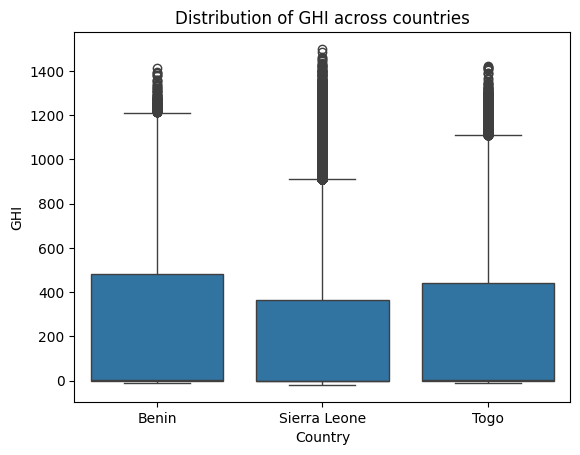

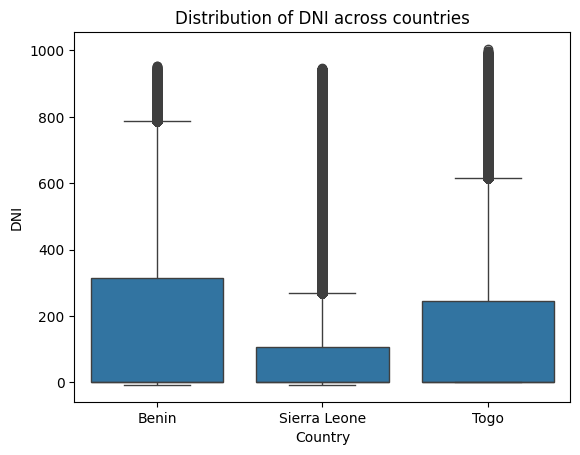

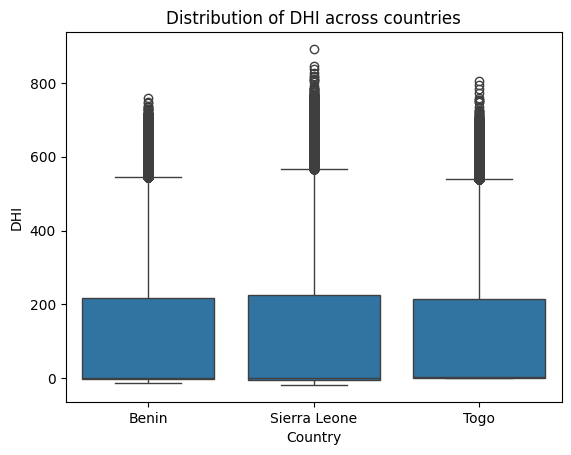

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

for metric in ['GHI', 'DNI', 'DHI']:
    sns.boxplot(data=df, x="Country", y=metric)
    plt.title(f"Distribution of {metric} across countries")
    plt.show()


In [3]:
df.groupby("Country")[["GHI", "DNI", "DHI"]].agg(["mean", "median", "std"])


GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         240.559452    1.8  331.131327  167.187516   -0.1  261.710501   
Sierra Leone  201.957515    0.3  298.495150  116.376337   -0.1  218.652659   
Togo          230.555040    2.1  322.532347  151.258469    0.0  250.956962   

                     DHI                     
                    mean median         std  
Country                                      
Benin         115.358961    1.6  158.691074  
Sierra Leone  113.720571   -0.1  158.946032  
Togo          116.444352    2.5  156.520714

In [4]:
from scipy.stats import f_oneway

f_oneway(benin["GHI"], sierra["GHI"], togo["GHI"])


F_onewayResult(statistic=np.float64(2090.092870479632), pvalue=np.float64(0.0))

Text(0.5, 1.0, 'Average GHI by Country')

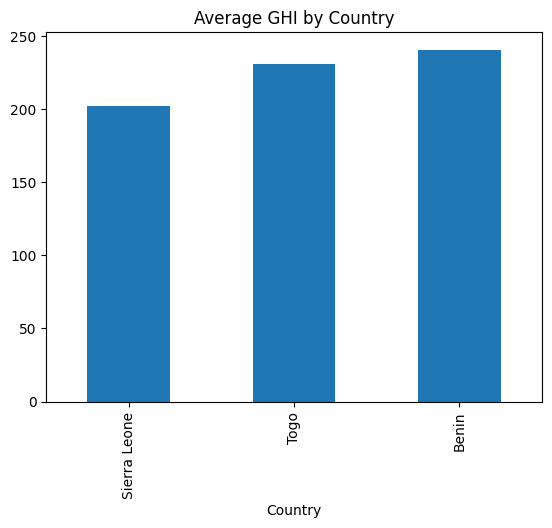

In [5]:
df.groupby("Country")["GHI"].mean().sort_values().plot(kind="bar")
plt.title("Average GHI by Country")
